In [1]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
training = np.load("/content/drive/MyDrive/Colab Notebooks/DataCP/mnist_training.npy")
valid = np.load("/content/drive/MyDrive/Colab Notebooks/DataCP/mnist_valid.npy")
test = np.load("/content/drive/MyDrive/Colab Notebooks/DataCP/mnist_test.npy")

In [3]:
print(np.shape(training))
print(np.shape(valid))
print(np.shape(test))

(30000, 785)
(5000, 785)
(10000, 785)


In [4]:
sample = training[0]
print(sample.shape)
print(sample)

(785,)
[  5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.
  18.  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170.
 253. 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.

5.0


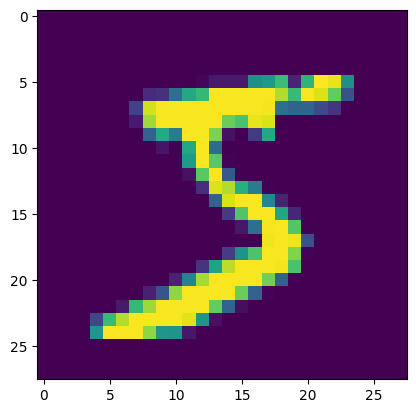

In [5]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

label = sample[0] # first element is the tagged number of the image
print(label)
image = sample[1:].reshape([28,28])/256
plt.imshow(image)

In [6]:
N = np.shape(training)[0] # number of images
Nvalid = np.shape(valid)[0]
Ntest = np.shape(test)[0]
print(N)
print(Nvalid)
print(Ntest)

30000
5000
10000


In [7]:
Ni = 28*28
No = 10 # 1,2,3 ...
Nh = 100 # hidden

In [8]:
lr = 1.0
Nep = 200

In [11]:
def ReLu(x) :
  return np.maximum(0,x)

def SOFTMAX(x) :
  dummy = np.exp(x)
  return dummy/np.sum(dummy,axis = 0)

def theta(x) :
  return np.heaviside(x, 1.0)

def E(d,z) :
  return -np.sum(d*np.log(z) + (1.0-d)*np.log(1.0-z))


In [10]:
W = np.random.random((Nh,Ni))*0.01
V = np.random.random((No,Nh))*0.01
b = np.random.random((Nh,1))*0.01
c = np.random.random((No,1))*0.01

In [22]:
d= np.zeros((No,N))
d_valid = np.zeros((No,Nvalid))
label = training[:,0].astype('int')

for n in range(N) :
  d[label[n],n] = 1

label_valid = valid[:,0].astype('int')
for n in range(Nvalid) :
  d_valid[label_valid[n],n] = 1

In [23]:
x = (training[:,1:]/255).T

print(x.shape)

x_valid = (valid[:,1:]/255).T
x_test = (test[:,1:]/255).T

(784, 30000)


In [24]:
lr_N = lr/N

In [25]:
x_arr = []
yarr1 = []
yarr2 = []

In [26]:
for ep in range(Nep) :
  v = W@x + b
  y = ReLu(v)
  s = V@y + c
  z = SOFTMAX(s)

  delta = d-z
  eps = (V.T@delta)*theta(v)

  V += lr_N*(delta@y.T)
  W += lr_N*(eps@ x.T)
  c += lr_N*np.sum(delta, axis = 1).reshape((No,1))
  b += lr_N*np.sum(eps, axis = 1).reshape((Nh,1))

  if (ep%10 == 0) :
    x_arr.append(ep)
    yarr1.append(E(d,z))
    v_valid = W @ x_valid + b
    y_valid = ReLu(v_valid)
    s_valid = V @ y_valid + c
    z_valid = SOFTMAX(s_valid)

    yarr2.append(np.mean(np.argmax(z_valid, axis=0) == np.argmax(d_valid, axis = 0)))
    print(x_arr[-1], yarr2[-1])


0 0.1942
10 0.3658
20 0.613
30 0.7064
40 0.844
50 0.852
60 0.9154
70 0.9266
80 0.8954
90 0.9364
100 0.9386
110 0.9326
120 0.9314
130 0.9458
140 0.9474
150 0.9498
160 0.9536
170 0.955
180 0.9566
190 0.9572


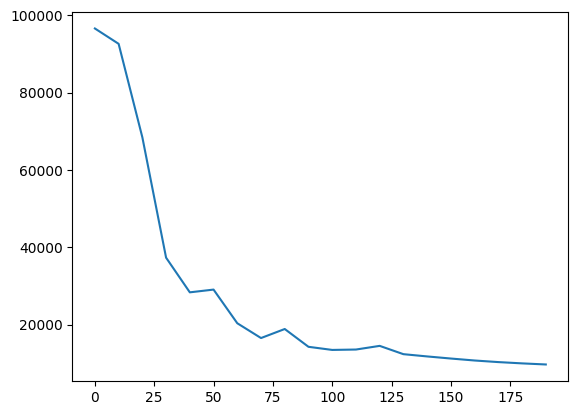

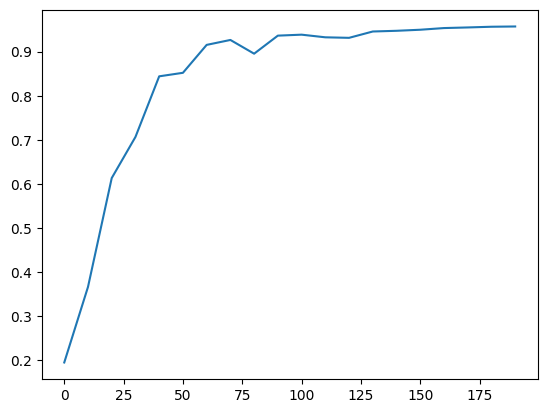

In [27]:
plt.plot(x_arr,yarr1)
plt.show()
plt.plot(x_arr,yarr2)
plt.show()

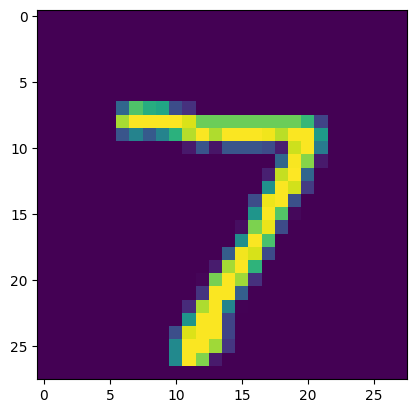

this image looks like  7 with a confidence of  0.998515273808419


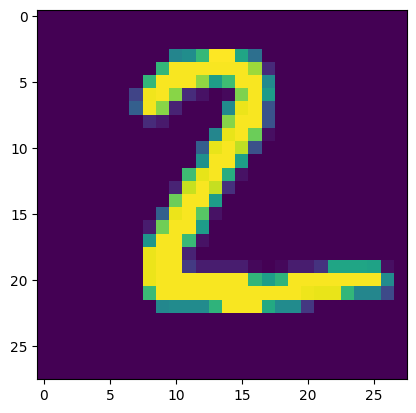

this image looks like  2 with a confidence of  0.9842508576515043


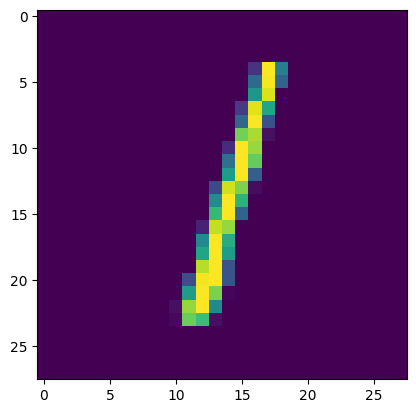

this image looks like  1 with a confidence of  0.9848415019565849


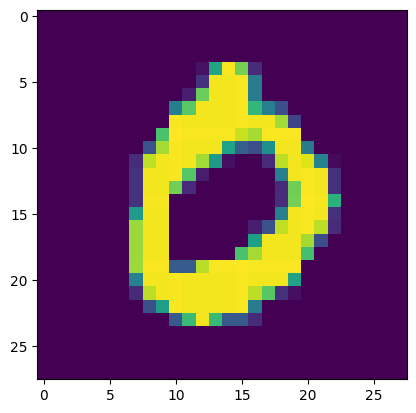

this image looks like  0 with a confidence of  0.999452574179981


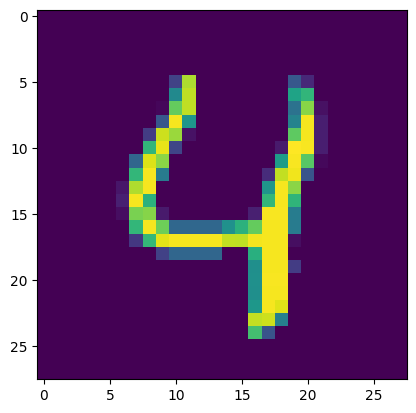

this image looks like  4 with a confidence of  0.9771035022399063


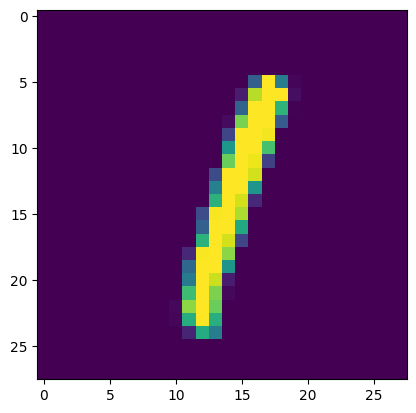

this image looks like  1 with a confidence of  0.9944459252781029


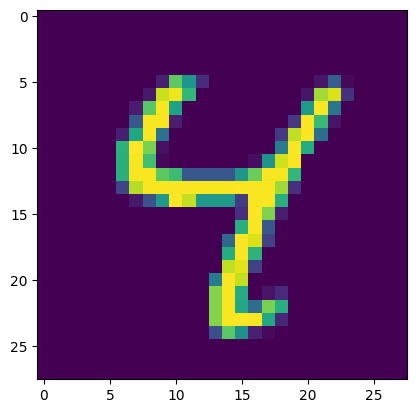

this image looks like  4 with a confidence of  0.9799830087979956


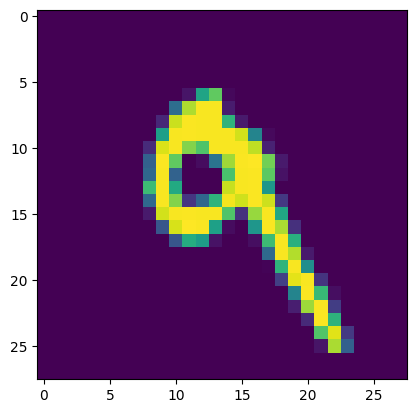

this image looks like  9 with a confidence of  0.9386637413788176


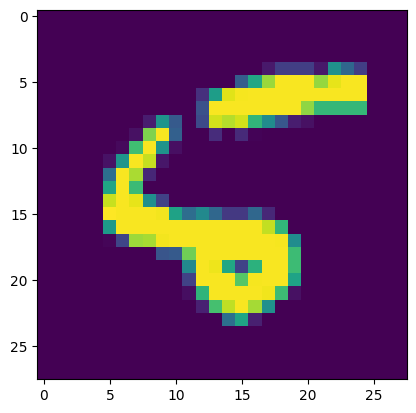

this image looks like  6 with a confidence of  0.981306984336908


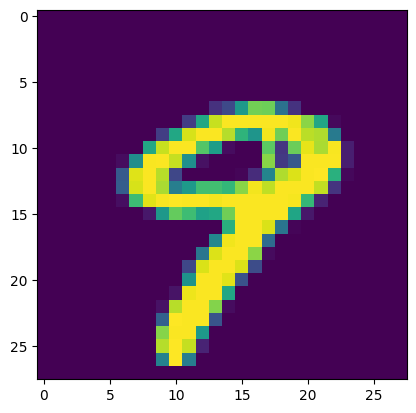

this image looks like  9 with a confidence of  0.9341491736775688


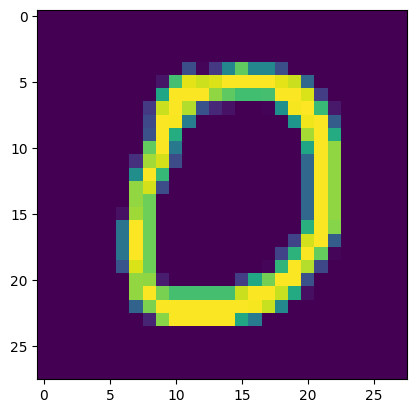

this image looks like  0 with a confidence of  0.9963196966788271


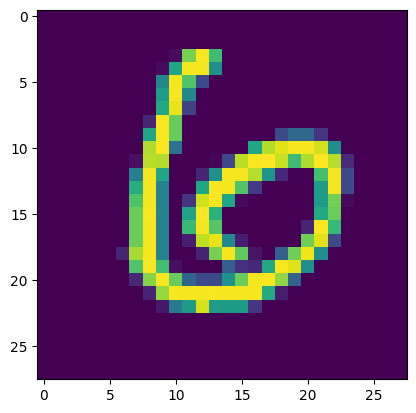

this image looks like  6 with a confidence of  0.9397318816310143


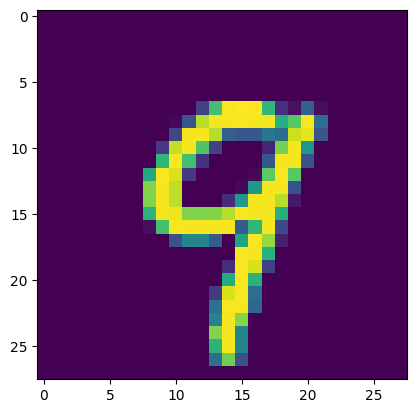

this image looks like  9 with a confidence of  0.9731719158874612


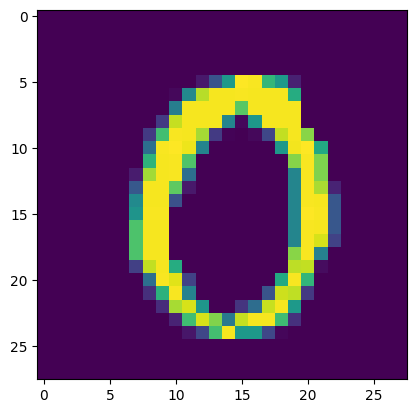

this image looks like  0 with a confidence of  0.9990583704701406


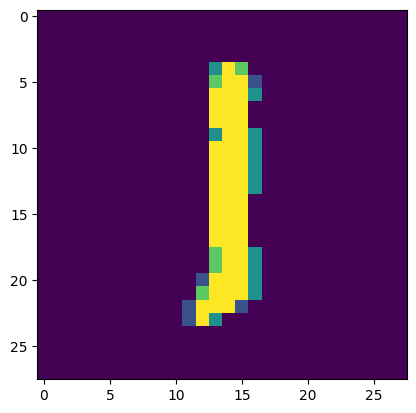

this image looks like  1 with a confidence of  0.99807090751574


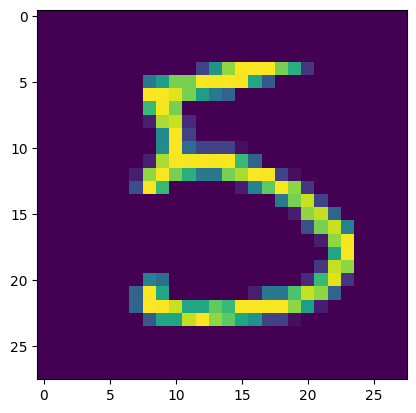

this image looks like  5 with a confidence of  0.9288326122528705


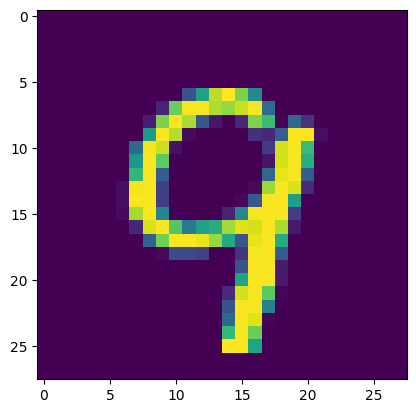

this image looks like  9 with a confidence of  0.9640749959785202


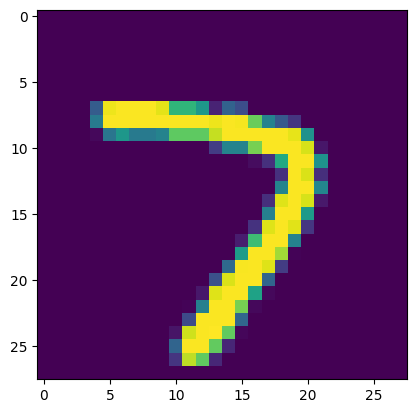

this image looks like  7 with a confidence of  0.9967364747567509


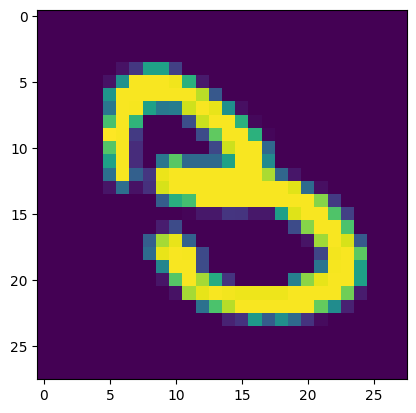

this image looks like  3 with a confidence of  0.8843714645799615


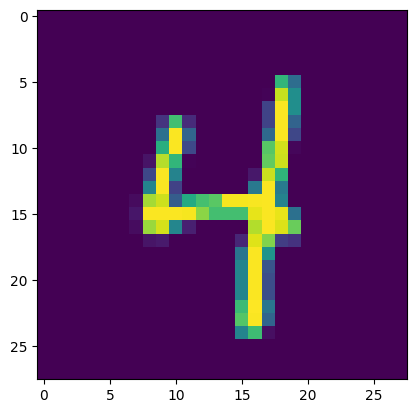

this image looks like  4 with a confidence of  0.9958343843203223


In [28]:
v = W@x_test + b
y = ReLu(v)
s = V@y + c
z = SOFTMAX(s)

for n in range(20) :
  image = x_test[:,n].reshape([28,28])/255
  plt.imshow(image)
  plt.show()
  print("this image looks like ", np.argmax(z[:,n]), "with a confidence of ", np.max(z[:,n]))

# HW 1

In [41]:
x_arr = []
yarr1 = []
yarr2 = []

In [44]:
lr = 0.001
Nep = 500
W = np.random.random((Nh,Ni))*0.01
V = np.random.random((No,Nh))*0.01
b = np.random.random((Nh,1))*0.01
c = np.random.random((No,1))*0.01

In [45]:
for ep in range(Nep) :
  v = W@x + b
  y = ReLu(v)
  s = V@y + c
  z = SOFTMAX(s)

  delta = d-z
  eps = (V.T@delta)*theta(v)

  V += lr_N*(delta@y.T)
  W += lr_N*(eps@ x.T)
  c += lr_N*np.sum(delta, axis = 1).reshape((No,1))
  b += lr_N*np.sum(eps, axis = 1).reshape((Nh,1))

  if (ep%10 == 0) :
    x_arr.append(ep)
    yarr1.append(E(d,z))
    v_valid = W @ x_valid + b
    y_valid = ReLu(v_valid)
    s_valid = V @ y_valid + c
    z_valid = SOFTMAX(s_valid)

    yarr2.append(np.mean(np.argmax(z_valid, axis=0) == np.argmax(d_valid, axis = 0)))
    print(x_arr[-1], yarr2[-1])


0 0.0978
10 0.2606
20 0.3918
30 0.6648
40 0.789
50 0.8512
60 0.8046
70 0.895
80 0.93
90 0.9276
100 0.9374
110 0.939
120 0.9362
130 0.9404
140 0.9464
150 0.9478
160 0.9496
170 0.9506
180 0.9518
190 0.9536
200 0.954
210 0.9536
220 0.9554
230 0.958
240 0.9582
250 0.9584
260 0.959
270 0.96
280 0.9602
290 0.9612
300 0.961
310 0.9612
320 0.9606
330 0.9614
340 0.9634
350 0.964
360 0.9644
370 0.9644
380 0.9648
390 0.9648
400 0.965
410 0.9648
420 0.9652
430 0.9652
440 0.9652
450 0.9656
460 0.9654
470 0.9654
480 0.9658
490 0.9662


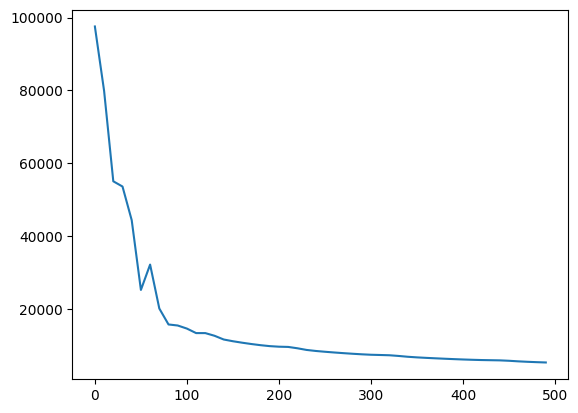

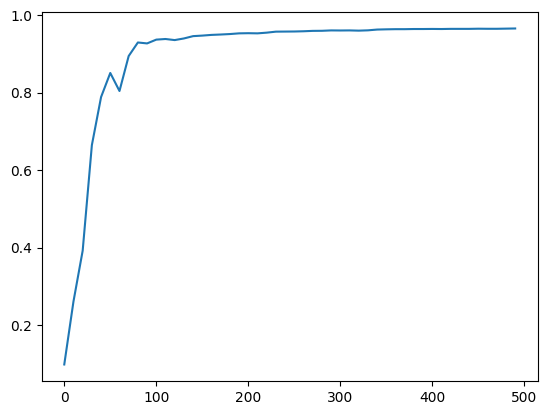

loss = 5397.241357764989, acc = 0.9662


In [46]:
plt.plot(x_arr,yarr1)
plt.show()
plt.plot(x_arr,yarr2)
plt.show()

# HW 2

In [47]:
x_arr = []
yarr1 = []
yarr2 = []

In [48]:
def SIGMOID(x):
    return 1 / (1 + np.exp(-x))

In [49]:
lr = 1.0
Nep = 200

In [50]:
for ep in range(Nep):
    v = W @ x + b
    y = ReLu(v)
    s = V @ y + c
    z = SIGMOID(s)  # Change from SOFTMAX to SIGMOID

    delta = d - z
    eps = (V.T @ delta) * theta(v)

    V += lr_N * (delta @ y.T)
    W += lr_N * (eps @ x.T)
    c += lr_N * np.sum(delta, axis=1).reshape((No, 1))
    b += lr_N * np.sum(eps, axis=1).reshape((Nh, 1))

    if ep % 10 == 0:
        x_arr.append(ep)
        yarr1.append(E(d, z))
        v_valid = W @ x_valid + b
        y_valid = ReLu(v_valid)
        s_valid = V @ y_valid + c
        z_valid = SIGMOID(s_valid)  # Change from SOFTMAX to SIGMOID

        yarr2.append(np.mean(np.argmax(z_valid, axis=0) == np.argmax(d_valid, axis=0)))
        print(x_arr[-1], yarr2[-1])

0 0.4206
10 0.381
20 0.7124
30 0.8032
40 0.8324
50 0.8728
60 0.909
70 0.857
80 0.9194
90 0.9094
100 0.929
110 0.9322
120 0.9344
130 0.9306
140 0.9224
150 0.9344
160 0.9402
170 0.9414
180 0.9428
190 0.941


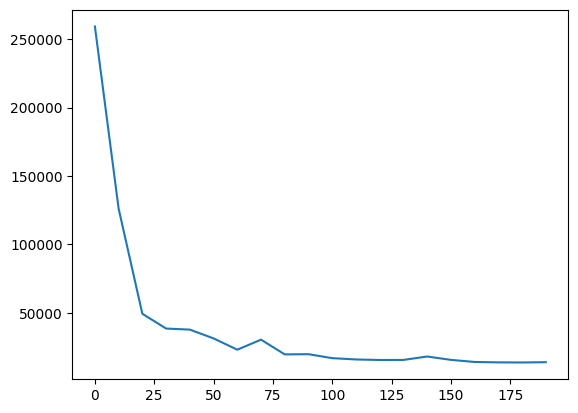

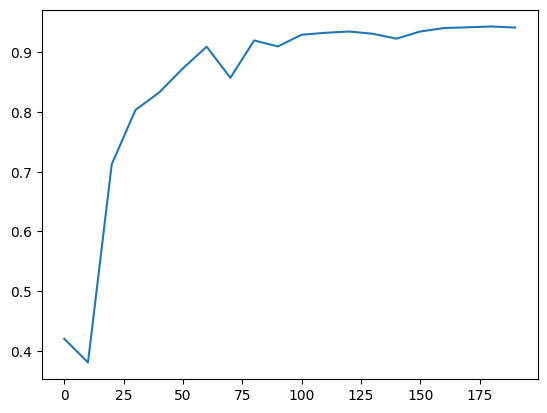

loss = 13954.181559718749, acc = 0.941


In [51]:
plt.plot(x_arr,yarr1)
plt.show()
plt.plot(x_arr,yarr2)
plt.show()

# HW 3

In [52]:
x_arr = []
yarr1 = []
yarr2 = []

In [53]:
for ep in range(Nep):
    v = W @ x + b
    y = SIGMOID(v)  # Change from ReLu to SIGMOID
    s = V @ y + c
    z = SIGMOID(s)  # Assuming the change from SOFTMAX to SIGMOID in the output layer

    delta = d - z
    eps = (V.T @ delta) * theta(v)

    V += lr_N * (delta @ y.T)
    W += lr_N * (eps @ x.T)
    c += lr_N * np.sum(delta, axis=1).reshape((No, 1))
    b += lr_N * np.sum(eps, axis=1).reshape((Nh, 1))

    if ep % 10 == 0:
        x_arr.append(ep)
        yarr1.append(E(d, z))
        v_valid = W @ x_valid + b
        y_valid = SIGMOID(v_valid)  # Change from ReLu to SIGMOID
        s_valid = V @ y_valid + c
        z_valid = SIGMOID(s_valid)  # Change from SOFTMAX to SIGMOID

        yarr2.append(np.mean(np.argmax(z_valid, axis=0) == np.argmax(d_valid, axis=0)))
        print(x_arr[-1], yarr2[-1])

0 0.4596
10 0.5562
20 0.605
30 0.633
40 0.65
50 0.6806
60 0.7044
70 0.7158
80 0.7358
90 0.7446
100 0.752
110 0.758
120 0.7648
130 0.7504
140 0.7672
150 0.7728
160 0.784
170 0.798
180 0.8002
190 0.8004


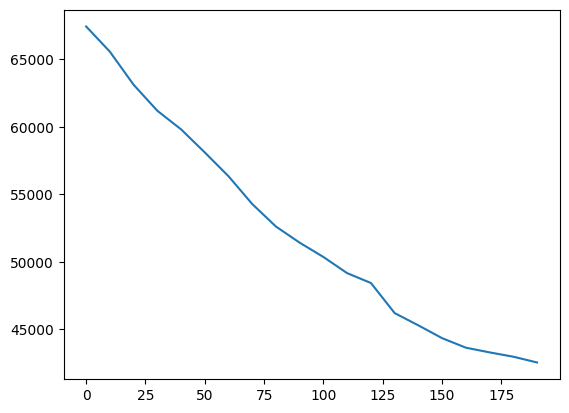

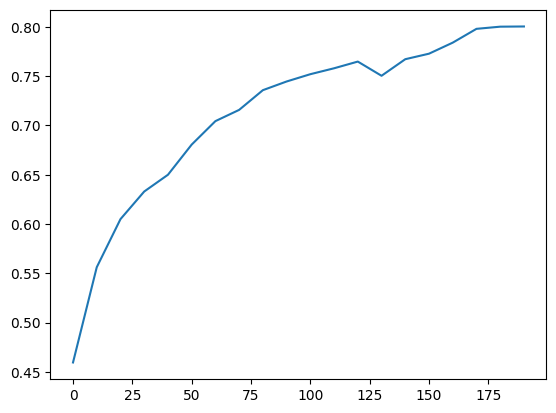

loss = 42544.25933752854, acc = 0.8004


In [54]:
plt.plot(x_arr,yarr1)
plt.show()
plt.plot(x_arr,yarr2)
plt.show()